# Limit state function and Monte Carlo Simulation

In this example we calculate an example for a limit state function, based on two normal distributed functions for load $S§ and resistance $R$. The limit state function $Z(X)=R(X)-S(X)$ is computed. The limit state indicating the separation bewtween structural failure and survival is $Z = 0$.

/tmp/ipykernel_2113/1710169973.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


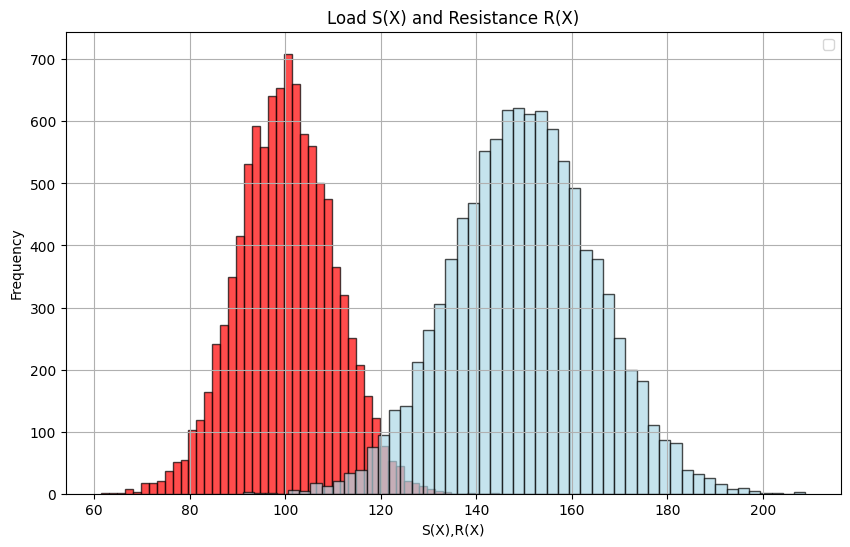

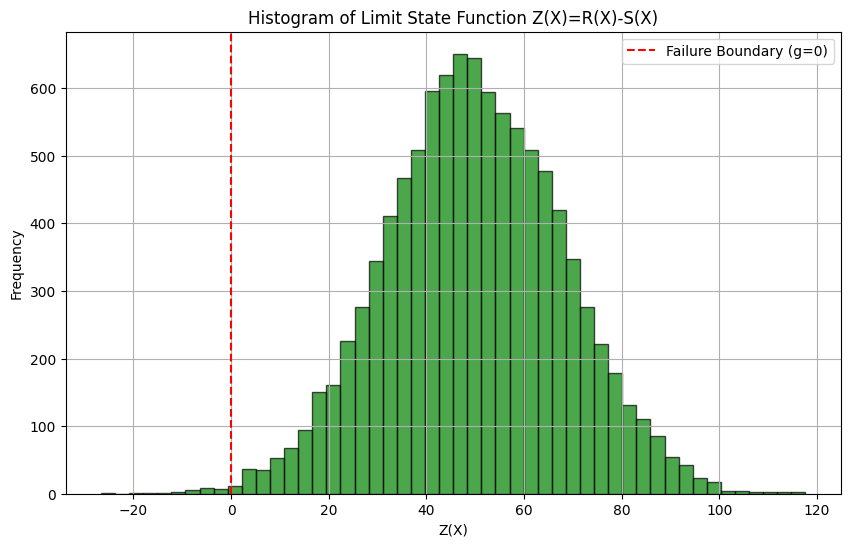

Probability of Failure: 0.0029


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mean_resistance = 150  # Mean resistance (e.g., kN)
std_resistance = 15    # Standard deviation of resistance

mean_load = 100        # Mean applied load (e.g., kN)
std_load = 10          # Standard deviation of applied load

# Define the limit state function
def limit_state_function(R, S):
    """
    Linear limit state function g(X) = R - S
    R: Resistance (random variable)
    S: Load (random variable)
    """
    return R - S

# Generate random samples for resistance and load
np.random.seed(42)  # For reproducibility
num_samples = 10000
resistance_samples = np.random.normal(mean_resistance, std_resistance, num_samples)
load_samples = np.random.normal(mean_load, std_load, num_samples)

# Evaluate the limit state function for each sample
Z_samples = limit_state_function(resistance_samples, load_samples)

# Calculate probability of failure
probability_of_failure = np.mean(Z_samples < 0)  # Fraction of samples where g(X) < 0

# Plot histograms of R(X), S(X)
plt.figure(figsize=(10, 6))
plt.hist(load_samples, bins=50, color='red', edgecolor='black', alpha=0.7)
plt.hist(resistance_samples, bins=50, color='lightblue', edgecolor='black', alpha=0.7)
plt.title("Load S(X) and Resistance R(X)")
plt.xlabel("S(X),R(X)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig('LimitStateMonteCarlo-RS.png', format='png', dpi=200)
plt.show()

# Plot histogram of g(X)
plt.figure(figsize=(10, 6))
plt.hist(Z_samples, bins=50, color='green', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label="Failure Boundary (g=0)")
plt.title("Histogram of Limit State Function Z(X)=R(X)-S(X)")
plt.xlabel("Z(X)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig('LimitStateMonteCarlo.png', format='png', dpi=200)
plt.show()

# Print probability of failure
print(f"Probability of Failure: {probability_of_failure:.4f}")

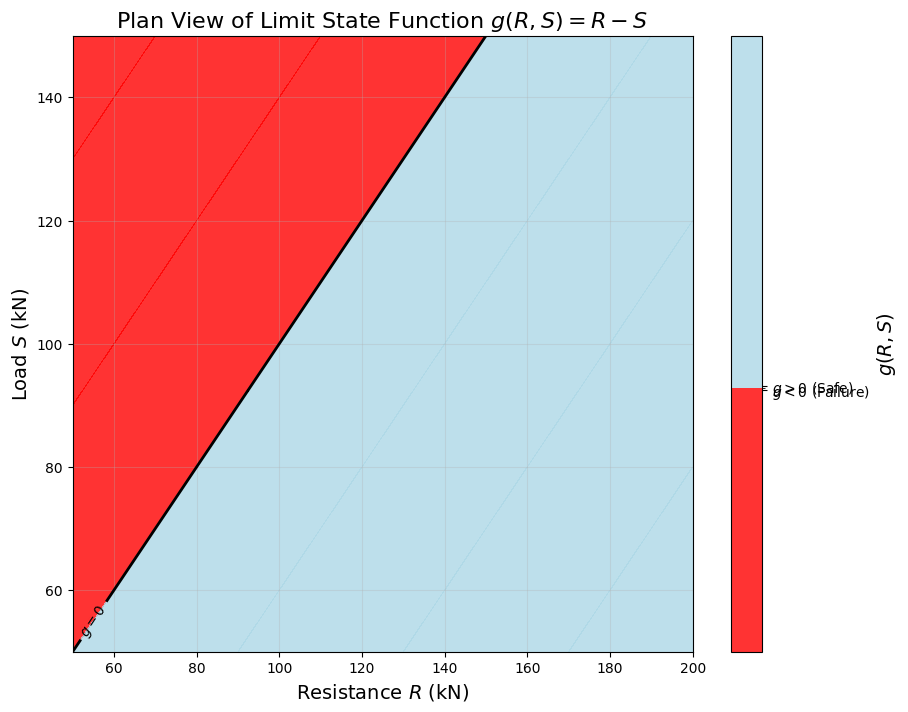

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Parameters for resistance (R) and load (S)
R_min, R_max = 50, 200  # Range of resistance values
S_min, S_max = 50, 150  # Range of load values

# Create a grid of R and S values
R = np.linspace(R_min, R_max, 100)
S = np.linspace(S_min, S_max, 100)
R_grid, S_grid = np.meshgrid(R, S)

# Compute the limit state function g(R, S) = R - S
g_grid = R_grid - S_grid

# Define custom colormap for two colors
cmap = ListedColormap(["red", "lightblue"])  # Red for g < 0, Green for g > 0
bounds = [-np.inf, 0, np.inf]  # Define boundaries for g
norm = BoundaryNorm(bounds, cmap.N)  # Normalize values to the two colors

# Create a contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(R_grid, S_grid, g_grid, cmap=cmap, norm=norm, alpha=0.8)
contour_lines = plt.contour(R_grid, S_grid, g_grid, levels=[0], colors="black", linestyles="solid", linewidths=2)

# Add labels and color bar
plt.title("Plan View of Limit State Function $g(R, S) = R - S$", fontsize=16)
plt.xlabel("Resistance $R$ (kN)", fontsize=14)
plt.ylabel("Load $S$ (kN)", fontsize=14)
cbar = plt.colorbar(contour, ticks=[-1, 1])  # Custom ticks for the two regions
cbar.ax.set_yticklabels(["$g < 0$ (Failure)", "$g > 0$ (Safe)"])  # Custom labels
cbar.set_label("$g(R, S)$", fontsize=14)

# Highlight the failure boundary
plt.clabel(contour_lines, inline=True, fontsize=10, fmt="$g=0$")

# Show the plot
plt.grid(alpha=0.3)
plt.show()


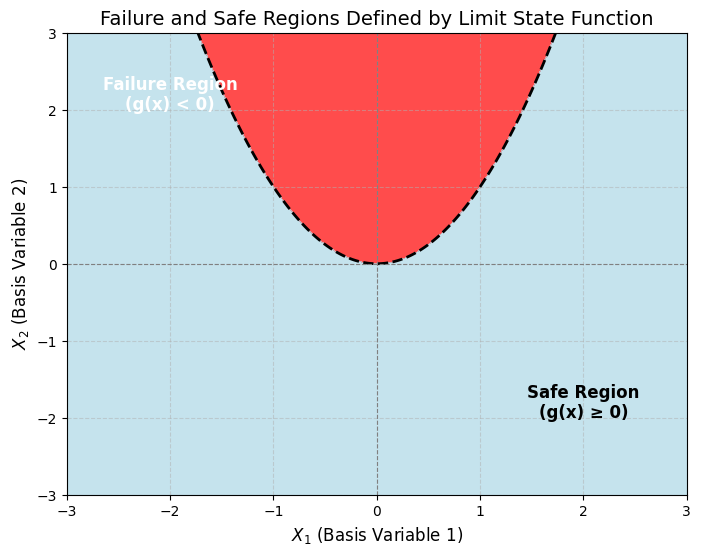

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the limit state function g(x1, x2)
def g(x1, x2):
    return x1**2 - x2

# Create a grid of x1 and x2 values
x1 = np.linspace(-3, 3, 500)
x2 = np.linspace(-3, 3, 500)
X1, X2 = np.meshgrid(x1, x2)

# Evaluate g(x1, x2) on the grid
G = g(X1, X2)

# Plot the failure and safe regions
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, G, levels=[-np.inf, 0, np.inf], colors=["red", "lightblue"], alpha=0.7)
plt.contour(X1, X2, G, levels=[0], colors="black", linewidths=2, linestyles="--")
#plt.colorbar(label="g(x1, x2)")

# Annotate regions
plt.text(-2, 2, "Failure Region\n(g(x) < 0)", color="white", fontsize=12, weight="bold", ha="center")
plt.text(2, -2, "Safe Region\n(g(x) ≥ 0)", color="black", fontsize=12, weight="bold", ha="center")

# Add labels and title
plt.xlabel("$X_1$ (Basis Variable 1)", fontsize=12)
plt.ylabel("$X_2$ (Basis Variable 2)", fontsize=12)
plt.title("Failure and Safe Regions Defined by Limit State Function", fontsize=14)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')

# Show the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('FailureSafeRegions.png', format='png', dpi=200)
plt.show()